## Introduction to Topic Modeling
  
Today we'll implement the most basic, and the original, topic modeling algorithm, LDA, using Python's scikit-learn. The other major topic modeling package is Gensim. 

### Learning Goals
* Implement a basic topic modeling algorithm and learn how to tweak it
* Learn how to use different methods to calculate topic prevalence
* Learn how to create some simple graphs with this output
* Think though how and why you might use topic modeling in a text analysis project

### Outline
<ol start="0">
  <li>The Pandas Dataframe: Music Reviews</li>
  <li>Fit an LDA Topic Model using scikit-learn</li>
  <li>Document by Topic Distribution</li>
  <li>Words Aligned with each Topic</li>
  <li>Topic Prevalence</li>
   <li>Topics Over Time</li>
</ol>

### Key Terms
* *Topic Modeling*:
    * A statistical model to uncover abstract topics within a text. It uses the co-occurrence fo words within documents, compared to their distribution across documents, to uncover these abstract themes. The output is a list of weighted words, which indicate the subject of each topic, and a weight distribution across topics for each document.
    
* *LDA*:
    * Latent Dirichlet Allocation. A implementation of topic modeling that assumes a Dirichlet prior. It does not take document order into account, unlike other topic modeling algorithms.
    
### Further Resources

[More detailed description of implementing LDA using scikit-learn](http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-topics-extraction-with-nmf-lda-py).
    
### 0. The Pandas Dataframe: Music Reviews

First, we read our music reviews corpus, which is stored as a .csv file on our hard drive, into a Pandas dataframe. 

In [1]:
import pandas
import numpy as np
df_lit = pandas.read_csv("../data/childrens_lit.csv.bz2", sep='\t', index_col=0, encoding = 'utf-8', compression='bz2')

#drop rows where the text is missing.
df_lit = df_lit.dropna(subset=['text'])

#view the dataframe
df_lit

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""..."
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C..."


### 1. Fit a Topic Model, using LDA

Now we're ready to fit the model. This requires the use of CountVecorizer, which we've already used, and the scikit-learn function LatentDirichletAllocation.

See [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) for more information about this function. 

In [2]:
####Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_samples = 2000
n_topics = 4
n_top_words = 50

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [3]:
# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

tf = tf_vectorizer.fit_transform(df_lit.text)

Extracting tf features for LDA...


In [4]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=n_samples,
                                random_state=0)
#fit the model
lda.fit(tf)

Fitting LDA models with tf features, n_samples=2000 and n_topics=4...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=80.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=4, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=2000, verbose=0)

In [5]:
#print the top words per topic, using the function defined above.
#Unlike R, which has a built-in function to print top words, we have to write our own for scikit-learn
#I think this demonstrates the different aims of the two packages: R is for social scientists, Python for computer scientists

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:

Topic #0:
project doctor girls sister papa mamma london baby sweet tom street works dr remarked aunt tea youth foundation presently study em ain cousin office darling loved ladies wasn everybody public flower observed nurse ma shop snow ye queen class reader ice stairs flowers lovely agreement sisters doesn carriage bell garden

Topic #1:
dick uncle doctor er jack ain tom den yer fish em rock wolf gun rope lads ha birds rocks beneath ay stream shock tail moments mate excitedly garden eh sand fishing thrust ye nay gazing softly mountain ship tremendous hook bird leg ashore growled penny shore stones farther jump knife

Topic #2:
king army french troops camp attack officers prince ship john soldiers city village officer guns rode shore regiment march tom fort wounded british boats sword advanced castle jack james indian band marched native prisoners ships arrows france numbers lads forest frank ride presently vessel fought mounted fleet column stream rear

Topic #3

In [ ]:
####Exercise:
###Copy and paste the above code and fit a new model, lda_new, by changing some of the parameters. How does this change the output.
###Suggestions:
## 1. Change the number of topics. 
## 2. Do not remove stop words. 
## 3. Change other options, either in the vectorize stage or the LDA model


### 2. Document by Topic Distribution

One thing we may want to do with the output is find the most representative texts for each topic. A simple way to do this (but not memory efficient), is to merge the topic distribution back into the Pandas dataframe.

First get the topic distribution array.

In [6]:
topic_dist = lda.transform(tf)
topic_dist

array([[  9.27993669e-01,   1.43700382e-02,   5.76027691e-02,
          3.35234006e-05],
       [  2.73383488e-02,   7.01313231e-02,   4.91328141e-01,
          4.11202187e-01],
       [  9.72301526e-01,   3.66126075e-05,   2.25981325e-02,
          5.06372922e-03],
       [  9.99907351e-01,   3.06661128e-05,   3.10550012e-05,
          3.09277922e-05],
       [  9.69292227e-01,   2.88828433e-02,   6.05477628e-05,
          1.76438162e-03],
       [  9.02818435e-01,   9.70583246e-02,   6.16743414e-05,
          6.15656757e-05],
       [  4.10396600e-01,   5.86307314e-01,   1.35979768e-04,
          3.16010688e-03],
       [  9.99890902e-01,   3.60980543e-05,   3.67128035e-05,
          3.62872482e-05],
       [  2.46371338e-01,   2.56589766e-01,   4.50088248e-01,
          4.69506480e-02],
       [  7.08481800e-05,   3.81086663e-01,   6.18771825e-01,
          7.06641686e-05],
       [  6.19417246e-02,   5.60865999e-02,   8.81890242e-01,
          8.14334923e-05],
       [  5.50253267e

Merge back in with the original dataframe.

In [8]:
topic_dist_df = pandas.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df_lit)
df_w_topics

,0,1,2,3,title,author gender,year,text
0,0.927994,0.014370,0.057603,0.000034,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,0.027338,0.070131,0.491328,0.411202,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...
2,0.972302,0.000037,0.022598,0.005064,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,0.999907,0.000031,0.000031,0.000031,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,0.969292,0.028883,0.000061,0.001764,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
5,0.902818,0.097058,0.000062,0.000062,A Round Dozen,Female,1883.0,\n A ROUND DOZEN. [Illustration: TOINETTE AND...
6,0.410397,0.586307,0.000136,0.003160,A Sailor's Lass,Female,1886.0,"A SAILOR'S LASS by EMMA LESLIE, Author of ""..."
7,0.999891,0.000036,0.000037,0.000036,A World of Girls,Female,1886.0,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...
8,0.246371,0.256590,0.450088,0.046951,Adrift in the Wild,Male,1887.0,Adrift in the Wilds; ...
9,0.000071,0.381087,0.618772,0.000071,Adventures in Africa,Male,1883.0,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C..."


Now we can sort the dataframe for the topic of interest, and view the top documents for the topics.
Below we sort the documents first by Topic 0 (looking at the top words for this topic I think it's about family, health, and domestic activities), and next by Topic 1 (again looking at the top words I think this topic is about children playing outside in nature). These topics may be a family/nature split?

Look at the titles for the two different topics. Look at the gender of the author. Hypotheses?

In [ ]:
print(df_w_topics[['title', 'author gender', 0]].sort_values(by=[0], ascending=False))

In [ ]:
print(df_w_topics[['title', 'author gender', 1]].sort_values(by=[1], ascending=False))

In [10]:
#EX: What is the average topic weight by author gender, for each topic?
### Which topic is most represented in texts by women? Most represented in texts by men?
### Which topic is least represented in texts by women? Least represented in texts by men?
### Grapth these results
#Hint: You can use the python 'range' function and a for-loop

topic_columns = range(0,4)
for num in topic_columns:
    print(num)

0
1
2
3


In [11]:
###Solution
grouped = df_w_topics.groupby("author gender")
for num in topic_columns:
    print(num)
    print(grouped[num].mean())

0
author gender
Female    0.653199
Male      0.323377
Name: 0, dtype: float64
1
author gender
Female    0.127721
Male      0.189827
Name: 1, dtype: float64
2
author gender
Female    0.157666
Male      0.326972
Name: 2, dtype: float64
3
author gender
Female    0.061414
Male      0.159824
Name: 3, dtype: float64


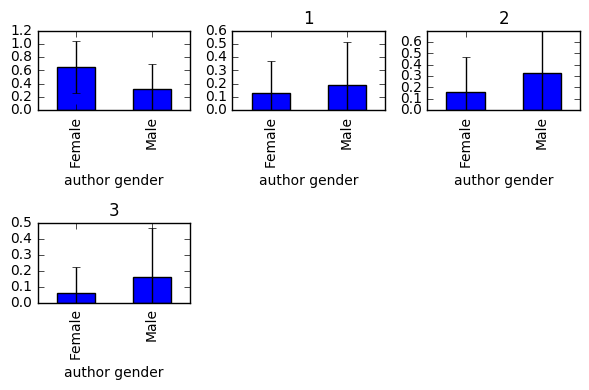

In [13]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
chrt = 0
for num in topic_columns:
    chrt += 1 
    ax = fig1.add_subplot(2,3, chrt)
    grouped[num].mean().plot(kind = 'bar', yerr = grouped[num].std(), ylim=0, ax=ax, title=num)

fig1.tight_layout()
plt.show()

### 3. Words Aligned with each Topic

Following DiMaggio et al., we can calculate the total number of words aligned with each topic, and compare by author gender.

In [14]:
#first create word count column

df_w_topics['word_count'] = df_w_topics['text'].apply(lambda x: len(str(x).split()))
df_w_topics['word_count']

0       96493
1      100603
2       85132
3       92822
4       48251
5       47458
6       22213
7       81524
8       62437
9       36261
10      36121
11      65607
12      26878
13      44150
14     111797
15      94611
16     111717
17      58938
18     109877
19     104108
20      96284
21     114023
22      52361
23     134448
24     118203
25      63804
26      96622
27      76560
28      70129
29      72278
        ...  
97       9780
98     120312
99     106870
100     53708
101     35597
102     98097
103     61837
104     35763
105     97099
106     55877
107     56009
108     74173
109     93133
110     11846
111     25056
112     30390
113     66809
114    123786
115    102634
116    117043
117     76185
118     91105
119     86289
120     31944
121    103197
122     68589
123     76593
124     56018
125     53942
126    108275
Name: word_count, dtype: int64

In [15]:
#multiple topic weight by word count

df_w_topics['0_wc'] = df_w_topics[0] * df_w_topics['word_count']
df_w_topics['0_wc']

0       89544.893129
1        2750.319905
2       82773.973483
3       92813.400143
4       46769.319262
5       42845.957306
6        9116.139669
7       81515.105886
8       15382.687259
9           2.569026
10       2237.397035
11          3.610047
12       4164.528255
13      36044.672450
14      70321.399880
15      49234.684858
16          2.897260
17        366.851042
18         42.573585
19          2.800026
20          2.598067
21          3.168580
22      52216.988908
23        283.692204
24          2.644958
25          3.150343
26      95896.335153
27      76551.036572
28      70120.161651
29         50.246646
           ...      
97       9779.054639
98     100890.504243
99       3208.710343
100     53702.509848
101     22013.960686
102     35965.518293
103     35521.018077
104         1.068321
105     66563.647404
106     39555.592775
107     55650.864584
108     74163.334956
109     92181.921151
110        55.625182
111         0.537831
112         0.978223
113     35004

In [ ]:
#create a for loop to do this for every topic

In [16]:
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics

,0,1,2,3,title,author gender,year,text,word_count,0_wc,1_wc,2_wc,3_wc
0,0.927994,0.014370,0.057603,0.000034,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,96493,89544.893129,1386.608095,5558.264002,3.234773
1,0.027338,0.070131,0.491328,0.411202,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...,100603,2750.319905,7055.421499,49429.084933,41368.173663
2,0.972302,0.000037,0.022598,0.005064,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...,85132,82773.973483,3.116905,1923.824216,431.085396
3,0.999907,0.000031,0.000031,0.000031,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...",92822,92813.400143,2.846490,2.882587,2.870780
4,0.969292,0.028883,0.000061,0.001764,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...",48251,46769.319262,1393.626070,2.921490,85.133178
5,0.902818,0.097058,0.000062,0.000062,A Round Dozen,Female,1883.0,\n A ROUND DOZEN. [Illustration: TOINETTE AND...,47458,42845.957306,4606.193969,2.926941,2.921784
6,0.410397,0.586307,0.000136,0.003160,A Sailor's Lass,Female,1886.0,"A SAILOR'S LASS by EMMA LESLIE, Author of ""...",22213,9116.139669,13023.644358,3.020519,70.195454
7,0.999891,0.000036,0.000037,0.000036,A World of Girls,Female,1886.0,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...,81524,81515.105886,2.942858,2.992975,2.958282
8,0.246371,0.256590,0.450088,0.046951,Adrift in the Wild,Male,1887.0,Adrift in the Wilds; ...,62437,15382.687259,16020.695214,28102.159918,2931.457609
9,0.000071,0.381087,0.618772,0.000071,Adventures in Africa,Male,1883.0,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C...",36261,2.569026,13818.583485,22437.285135,2.562353


In [17]:
#EX: What is the total number of words aligned with each topic, by author gender?
#EX: What is the proportion of total words aligned with each topic, by author gender?

grouped = df_w_topics.groupby('author gender')
for e in col_list:
    print(e)
    print(grouped[e].sum()/grouped['word_count'].sum())

0_wc
author gender
Female    0.764428
Male      0.311538
dtype: float64
1_wc
author gender
Female    0.098634
Male      0.217664
dtype: float64
2_wc
author gender
Female    0.092519
Male      0.328384
dtype: float64
3_wc
author gender
Female    0.044419
Male      0.142414
dtype: float64


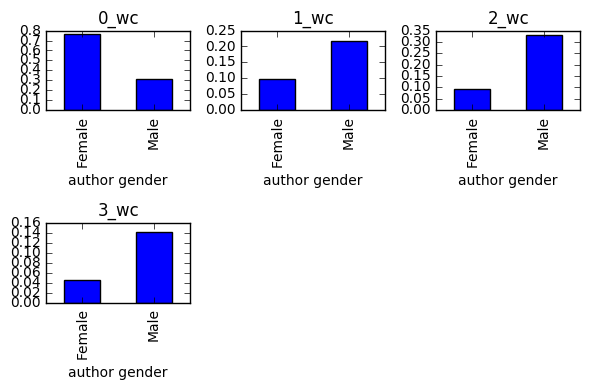

In [18]:
fig2 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig2.add_subplot(2,3, chrt)
    (grouped[e].sum()/grouped['word_count'].sum()).plot(kind = 'bar', ylim=0, ax=ax2, title=e)

fig2.tight_layout()
plt.show()

Question: Why might we want to do one calculation over the other? Take average topic weight per documents versus the average number of words aligned with each topic?

This brings us to...

### 4. Topic Prevalence 

In [19]:
###EX: 
#       Find the most prevalent topic in the corpus.
#       Find the least prevalent topic in the corpus. 
#       Hint: How do we define prevalence? What are different ways of measuring this,
#              and the benefits/drawbacks of each?       

for e in col_list:
    print(e)
    print(df_w_topics[e].sum()/df_w_topics['word_count'].sum())

0_wc
0.384043289531
1_wc
0.198607934193
2_wc
0.290622883314
3_wc
0.126725892963


### 4. Prevalence over time

We can do the same as above, but by year, to graph the prevalence of each topic over time.

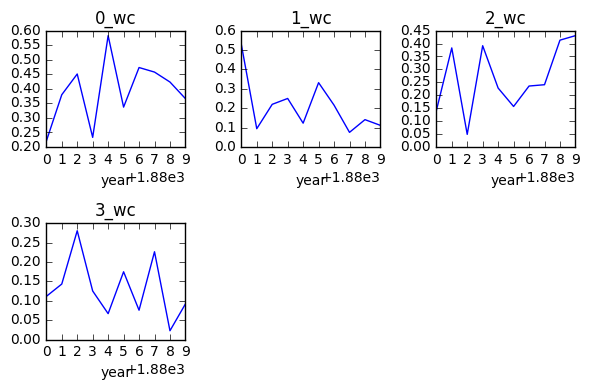

In [20]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['word_count'].sum()).plot(kind='line', title=e)
    
fig3.tight_layout()
plt.show()

Topic 2 I interpret to be about battles in France. What is going on between 1800 and 1804 in France that might make this topic increasingly popular over this time period?